<a href="https://colab.research.google.com/github/rahiakela/probabilistic-programming-practice/blob/main/bayesian-analysis-with-python/1-thinking-probabilistically/1_probability_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Probability distributions

A probability distribution is a mathematical object that describes how likely different events are. In general, these events are restricted somehow to a set of possible events, such `{1, 2, 3, 4, 5, 6}` as for a die.

##Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az

az.style.use('arviz-darkgrid')

##Normal distribution

If a variable, $X$, can be described by a probability distribution, then we call $X$ a random variable.

As a general rule, to indicate the objects random variable. $x$ can be a
vector and thus contains many elements or individual values $x=(x_1, x_2,...,x_n)$.

Let's see an example using Python; our true probability distribution will be a Normal (or Gaussian) distribution with means of $\mu=0$ and $\sigma=1$;these two parameters completely and unambiguously define a Normal distribution.



In [2]:
mu = 0
sigma = 1

X = stats.norm(mu, sigma)
x = X.rvs(3)
x

array([ 0.0030959 ,  1.19870485, -0.3379762 ])

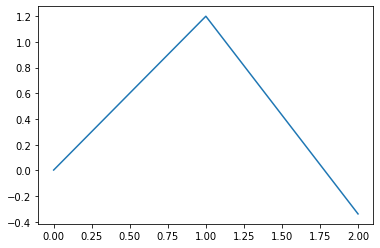

In [3]:
plt.plot(x)
plt.show()

## Gaussian distribution

A variable, $X$, follows a Gaussian distribution if its
values are dictated by the following expression:

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x - \mu)^2}{2\sigma^2}}$$

This is the probability density function for the Normal distribution.



[]

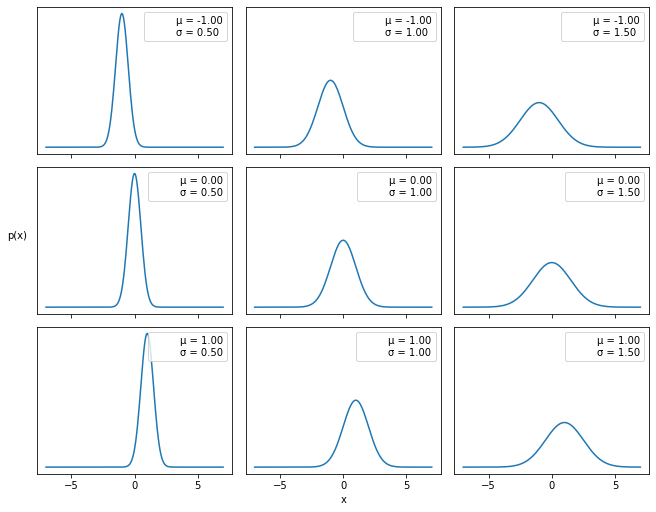

In [9]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]

x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True, figsize=(9, 7), constrained_layout=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i,j].legend(loc=1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])

There are two types of random variables: continuous and discrete. Continuous variables
can take any value from some interval (we can use Python floats to represent them), and
discrete variables can take only certain values (we can use Python integers to represent
them). The Normal distribution is a continuous distribution.